## Исследование продажи видеоигр

Задача проекта состоит в том, чтобы по историческим данным о продажах игр в разных географических сегментах, оценках игры и платформе предположить, какие игры будут востребованы в будущем, чтобы составить план рекламы для магазина "Стримчик" на будущий год.

Этапы выполнения проекта: 


1.   Подготовка данных: изменение типов данных, устранение пропусков, вычисление новых параметров
2.   Анализ продаж по годам и платформам - как продажи меняются со временем, как зависят от отзывов критиков
3. Составление портретов пользователей трех исследуемых регионов: Северная Америка, Европа, Япония
4. Проверка статистических гипотез, сформулированных клиентом:

*   Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
*   Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


5.  Общий вывод



In [ ]:
#импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from scipy.stats.stats import pearsonr
from scipy.stats import f_oneway
import scipy.stats as stats

In [ ]:
#загрузим предоставленный датасет
df = pd.read_csv('/datasets/games.csv')

display(df.head())

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
#рассмотрим описательные статистики данных
display(df.describe())

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [ ]:
#посмотрим, какие типы данных представлены в датасете, а также оценим процент пропусков
print(df.info())

pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,0
Name,0.000000
Platform,0.000000
Year_of_Release,2.000000
Genre,0.000000
NA_sales,0.000000
EU_sales,0.000000
JP_sales,0.000000
Other_sales,0.000000
Critic_Score,51.000000
User_Score,40.000000


### Подготовка данных

Приведем названия столбцов и содержание столбцов с текстовыми данными к нижнему регистру. 

In [ ]:
#сейчас названия столбцов следующие:

print(df.columns)

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.lower()
for i in ['name', 'platform', 'genre', 'rating']:
    df[i] = df[i].str.lower()

In [ ]:
#col = []
#for i in list(df.columns):
#    col.append(i.lower())
#df.columns = col
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006.0,sports,41.36,28.96,3.77,8.45,76.0,8,e
1,super mario bros.,nes,1985.0,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,mario kart wii,wii,2008.0,racing,15.68,12.76,3.79,3.29,82.0,8.3,e
3,wii sports resort,wii,2009.0,sports,15.61,10.93,3.28,2.95,80.0,8,e
4,pokemon red/pokemon blue,gb,1996.0,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Рассмотрим типы данных, представленные в таблице: 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


Рассмотрим число пропусков в каждом столбце:

In [ ]:
print('{0:16} {1}'.format('столбец', 'число пропусков'))
for i in df.columns:
    print('{0:20} {1:5}'.format(i, df[i].isna().sum()))
print()
print('Всего объектов:', df.shape[0])

столбец          число пропусков
name                     2
platform                 0
year_of_release        269
genre                    2
na_sales                 0
eu_sales                 0
jp_sales                 0
other_sales              0
critic_score          8578
user_score            6701
rating                6766

Всего объектов: 16715


Значения в столбце с годом выпуска следует привести к целочисленному типу, что улучшит визуализацию и оптимизирует хранение данных, также необходимо заменить пропущенные значения в столбце с оценкой пользователя на значение-заглушку и сменить тип на дробные числа. 

Выберем значение-заглушку для численных значений как -1 (в дальнейшем эти значения будет легко отсеять с помощью условия "больше 0"), а а для текстовых - "unknown". 

In [ ]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            #.set_xlabel('%', loc='right')   
            .set_title('Процент пропущенных значений для разных параметров' + "\n", fontsize = 22, color = 'SteelBlue') 
            
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')


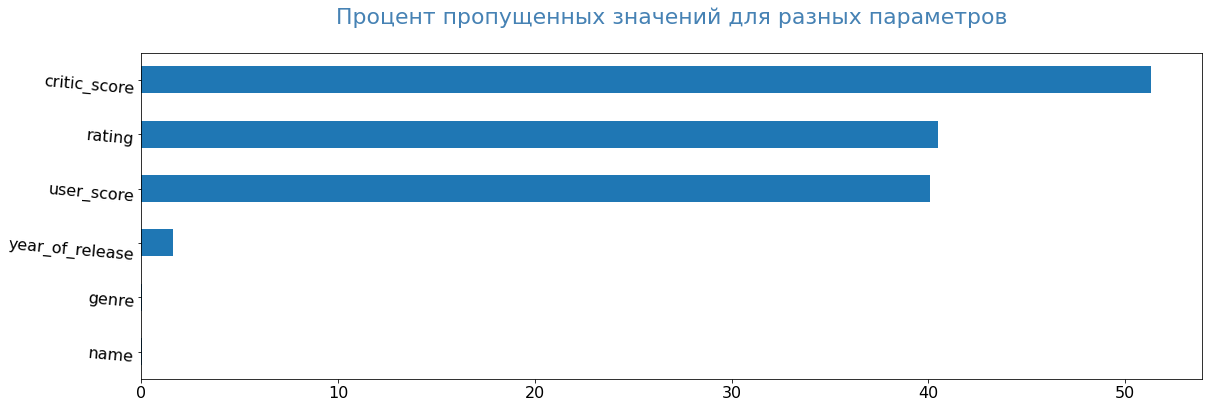

In [ ]:
pass_value_barh(df)

In [ ]:
pd.DataFrame(round(df.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


Рассмотрим значения в столбце "user_score":

In [ ]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим 2 "необычных" значения - nan и tbd. nan обозначает отсутствие данных; tbd = to be determined - значения для данного продукта мы не имеем по каким-то причинам, для анализа изменим на значение-заглушку. 

In [ ]:
for i in ['year_of_release', 'user_score', 'critic_score', 'rating']:
    df[i].fillna(-1, inplace=True)

In [ ]:
df.loc[df['user_score']=='tbd', 'user_score'] = -1

In [ ]:
df['critic_score'] = df['critic_score'].astype('int64')
df['year_of_release'] = df['year_of_release'].astype('int64')

In [ ]:
df['user_score'] = df['user_score'].astype('float64')

In [ ]:
for i in ['name', 'rating', 'genre']:
    df[i].fillna('unknown', inplace=True)

In [ ]:
df = df[(df['genre']!='unknown') | (df['name']!='unknown')]

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  int64  
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB
None


Снова рассмотрим число пропусков:

In [ ]:
print('{0:16} {1}'.format('столбец', 'число пропусков'))
for i in df.columns:
    print('{0:20} {1:5}'.format(i, df[i].isna().sum()))
print()
print('Всего объектов:', df.shape[0])

столбец          число пропусков
name                     0
platform                 0
year_of_release          0
genre                    0
na_sales                 0
eu_sales                 0
jp_sales                 0
other_sales              0
critic_score             0
user_score               0
rating                   0

Всего объектов: 16713


После заполнения значений на заглушки найдем дубликаты. Проверим, что явных полных дупликатов нет (см. ниже). Определяющими строками (аналогами id) в данном датасете можно считать комбинацию названия игры и ее платформы. Создадим отдельный датафрейм, в который запишем, сколько раз игра на определенной платформе встречалась в исходном датасете.

In [ ]:
#предварительно проверим, что данные по платформам введены корретно 
#и не содержат дубликатов

np.sort(df['platform'].unique())

array(['2600', '3do', '3ds', 'dc', 'ds', 'gb', 'gba', 'gc', 'gen', 'gg',
       'n64', 'nes', 'ng', 'pc', 'pcfx', 'ps', 'ps2', 'ps3', 'ps4', 'psp',
       'psv', 'sat', 'scd', 'snes', 'tg16', 'wii', 'wiiu', 'ws', 'x360',
       'xb', 'xone'], dtype=object)

In [ ]:
#проверим, что в названии игр нет дубликатов вследствие использования разного регистра
print(len(df['name'].unique()) - len(df['name'].str.lower().unique()))

0


In [ ]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [name, platform, year_of_release, genre, na_sales, eu_sales, jp_sales, other_sales, critic_score, user_score, rating]
Index: []


In [ ]:
duplicates = df.pivot_table(index = ['name', 'platform'], values = 'na_sales', aggfunc = 'count')
print(duplicates.head())

                                      na_sales
name                        platform          
 beyblade burst             3ds              1
 fire emblem fates          3ds              1
 frozen: olaf's quest       3ds              1
                            ds               1
 haikyu!! cross team match! 3ds              1


Рассмотрим, какие комбинации встречались больше одного раза:

In [ ]:
duplicates = duplicates[duplicates['na_sales']>1]
print(duplicates)

                                      na_sales
name                        platform          
madden nfl 13               ps3              2
need for speed: most wanted pc               2
                            x360             2
sonic the hedgehog          ps3              2


Посмотрим, чем отличаются разные вхождения:

In [ ]:
display(df[(df['name']=='Madden NFL 13'.lower()) & (df['platform'] == 'ps3')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,madden nfl 13,ps3,2012,sports,2.11,0.22,0.0,0.23,83,5.5,e
16230,madden nfl 13,ps3,2012,sports,0.00,0.01,0.0,0.00,83,5.5,e


In [ ]:
display(df[(df['name']=='Need for Speed: Most Wanted'.lower()) & (df['platform'].isin(['pc', 'x360']))])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1190,need for speed: most wanted,x360,2012,racing,0.62,0.78,0.01,0.15,83,8.5,t
1591,need for speed: most wanted,x360,2005,racing,1.00,0.13,0.02,0.10,83,8.5,t
5972,need for speed: most wanted,pc,2005,racing,0.02,0.23,0.00,0.04,82,8.5,t
11715,need for speed: most wanted,pc,2012,racing,0.00,0.06,0.00,0.02,82,8.5,t


In [ ]:
display(df[(df['name']=='Sonic the Hedgehog'.lower()) & (df['platform'] == 'ps3')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1745,sonic the hedgehog,ps3,2006,platform,0.41,0.06,0.04,0.66,43,4.1,e10+
4127,sonic the hedgehog,ps3,-1,platform,0.00,0.48,0.00,0.00,43,4.1,e10+


В случае с Sonic the Hedgehog и Madden NFL 13 одно вхождение содержит информацию о продажах и оценках, а второе - только об оценках. Второе вхождение следует удалить.

В случае Need for speed отличается год - одна из игр является перезапуском. Так как она производилась в сотрудничестве с Criterion Games изменим ее название на Need for Speed: Most Wanted Criterion (сделаем это для всех платформ, не только для тех, где значения повторялись).

In [ ]:
df.loc[(df['name']=='Need for Speed: Most Wanted'.lower()) \
    & (df['year_of_release'] == 2012), 'name'] \
    = 'Need for Speed: Most Wanted Criterion'.lower()

In [ ]:
df = df.drop (index= [16230, 4127])

Повторим ту же операцию по выявлению дубликатов:

In [ ]:
duplicates = df.pivot_table(index = ['name', 'platform'], values = 'na_sales', aggfunc = 'count')
duplicates = duplicates[duplicates['na_sales']>1]
print(duplicates)

Empty DataFrame
Columns: [na_sales]
Index: []


In [ ]:
#мы удаляли некоторые значения, обновим индексы
df.reset_index(drop=True, inplace=True)

Составим для каждой игры столбец с общими продажами по регионам:

In [ ]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [ ]:
display(df.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-1,-1.0,-1,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-1,-1.0,-1,31.38


In [ ]:
# check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16711 entries, 0 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16711 non-null  int64  
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     16711 non-null  int64  
 9   user_score       16711 non-null  float64
 10  rating           16711 non-null  object 
 11  total_sales      16711 non-null  float64
dtypes: float64(6), int64(2), object(4)
memory usage: 1.5+ MB


### Исследовательский анализ данных

Рассмотрим, сколько игр выпускалось в разные годы:

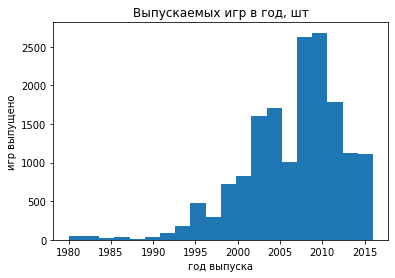

In [ ]:
fig, ax = plt.subplots()
ax.hist(df[df['year_of_release']>0]['year_of_release'], bins=20)
ax.set_title('Выпускаемых игр в год, шт');
ax.set_xlabel('год выпуска');
ax.set_ylabel('игр выпущено');

В целом число игр растет, однако последние несколько лет наблюдается спад. Можно предположить, что в скором времени снова будет заметен рост, для получения более точной информации необходимо обратиться к аналитикам, однако можно спекулировать на тему: 
- инвестиций в медиа
- изменения правил платформ распространения игр
- выхода новых движков (Source, Unreal Engine, бесплатный Unity..)

Рассмотрим, как менялись с годами продажи на разных платформах. Рассмотрим 5 платформ, для которых продано больше всего копий видеоигр, построим гистограммы распределения продаж по годам.

In [ ]:
platforms = df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
print(platforms.sort_values('total_sales', ascending = False).head(10))

          total_sales
platform             
ps2           1255.77
x360           971.42
ps3            939.16
wii            907.51
ds             806.12
ps             730.86
gba            317.85
ps4            314.14
psp            294.05
pc             259.52


In [ ]:
most_popular = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']
for i in range(len(most_popular)):
    most_popular[i]=most_popular[i].lower()

In [ ]:
popular = {}
for i in most_popular:
    popular[i]={}

In [ ]:
for platform in most_popular:   
    for year in df[(df['platform']==platform) & (df['year_of_release']>0)]['year_of_release'].unique():
        popular[platform][year] = df[(df['platform']==platform)&(df['year_of_release']==year)]['total_sales'].sum()


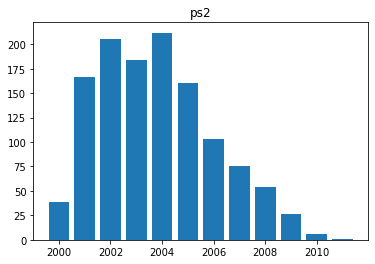

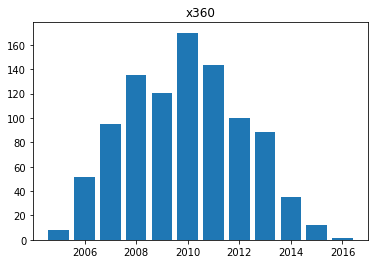

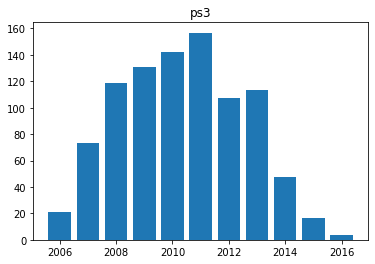

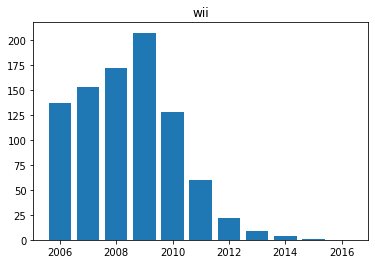

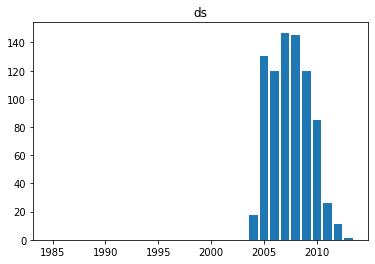

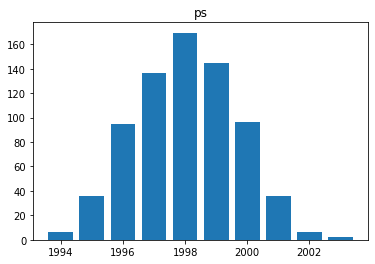

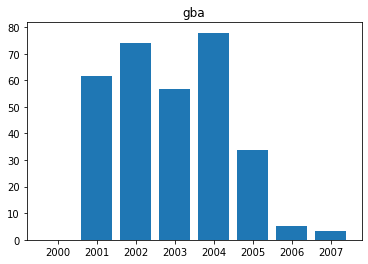

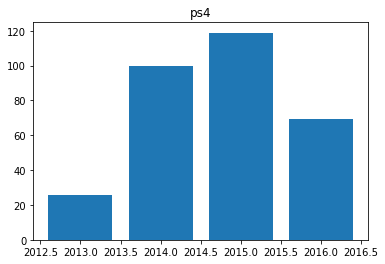

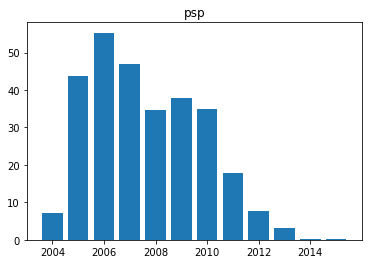

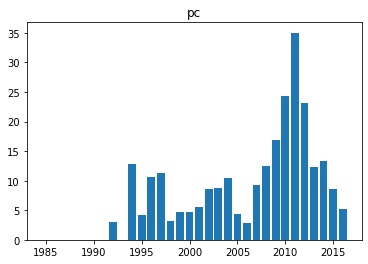

In [ ]:
for i in popular.keys():    
    keys = popular[i].keys()
    values = popular[i].values()
    plt.bar(keys, values)
    plt.title(i)
    plt.show()

На данных графиках видно, что платформы (за исключением ПК) популярны примерно в течение 10 лет. Из платформ, игры которых имеют максимальные продажи за все время наблюдений, к 2016 году остаются популярными PS4 и PC, однако выводы об актуальности платформ в настоящее время будут получены при анализе последних трех лет ниже.

In [ ]:
display(df[(df['platform']=='ds')&(df['year_of_release']>0)].sort_values('year_of_release').head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15954,strongest tokyo university shogi ds,ds,1985,action,0.00,0.00,0.02,0.0,-1,-1.0,-1,0.02
13461,cocoto kart racer,ds,2004,racing,0.04,0.00,0.00,0.0,-1,-1.0,e,0.04
11515,kenshuui tendo dokuta,ds,2004,simulation,0.00,0.00,0.08,0.0,-1,-1.0,-1,0.08
4419,the urbz: sims in the city (all regions sales),ds,2004,simulation,0.40,0.01,0.02,0.0,-1,-1.0,-1,0.43
7900,daigasso! band brothers,ds,2004,misc,0.00,0.00,0.19,0.0,-1,-1.0,-1,0.19


Видим, что для Nintendo DS, вышедшей в 2004 году, в базе данных присутствует игра 1985 года - вероятно, она далее была портирована на DS,  но мы не можем точно утверждать, поэтому удалим данную строку.

In [ ]:
df = df.drop (index= 15954)
df.reset_index(drop=True, inplace=True)

Теперь рассмотрим те же данные, но за актуальный период - игры, вышедшие в 2014 году и позже.

In [ ]:
#создадим датасет с актуальными данными
data = df[df['year_of_release']>2013]

In [ ]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,call of duty: black ops 3,ps4,2015,shooter,6.03,5.86,0.36,2.38,-1,-1.0,-1,14.63
42,grand theft auto v,ps4,2014,action,3.96,6.31,0.38,1.97,97,8.3,m,12.62
47,pokemon omega ruby/pokemon alpha sapphire,3ds,2014,role-playing,4.35,3.49,3.10,0.74,-1,-1.0,-1,11.68
77,fifa 16,ps4,2015,sports,1.12,6.12,0.06,1.28,82,4.3,e,8.58
87,star wars battlefront (2015),ps4,2015,shooter,2.99,3.49,0.22,1.28,-1,-1.0,-1,7.98


In [ ]:
platf = data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
display(platf.sort_values('total_sales', ascending=False))

,total_sales
platform,
ps4,288.15
xone,140.36
3ds,86.68
ps3,68.18
x360,48.22
wiiu,42.98
pc,27.05
psv,22.40
wii,5.07


Видим, что картина популярности платформ значительно отличается от суммарной. Возьмем первые 8 значений, так как продажи игр для Wii уже совсем небольшие, на рынке ее заместил новый вариант - WiiU. Проведем аналогичные манипуляции и визуализируем данные за 3 года.

In [ ]:
best_platforms = ['ps4', 'xone', '3ds', 'ps3', 'x360', 'wiiu', 'pc', 'psv']

In [ ]:
popular = {}
for i in best_platforms:
    popular[i]={}
for platform in best_platforms:   
    for year in data[data['platform']==platform]['year_of_release'].unique():
        popular[platform][year] = data[(data['platform']==platform)&(data['year_of_release']==year)]['total_sales'].sum()


In [ ]:
#popular = {}
#for i in best_platforms:
#    popular[i]={}
#for platform in best_platforms:   
#    for year in df[(df['platform']==platform) & (df['year_of_release']>2013)]['year_of_release'].unique():
#        popular[platform][year] = df[(df['platform']==platform)&(df['year_of_release']==year)]['total_sales'].sum()


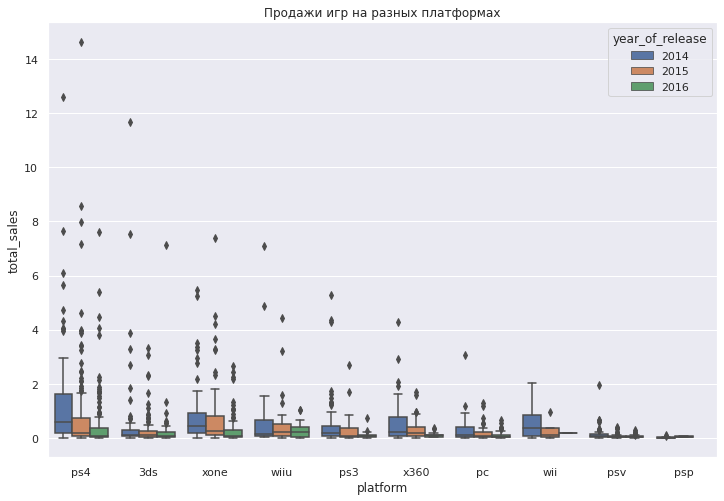

In [ ]:
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(data=data, x="platform", y="total_sales", hue="year_of_release")\
    .set(title='Продажи игр на разных платформах');

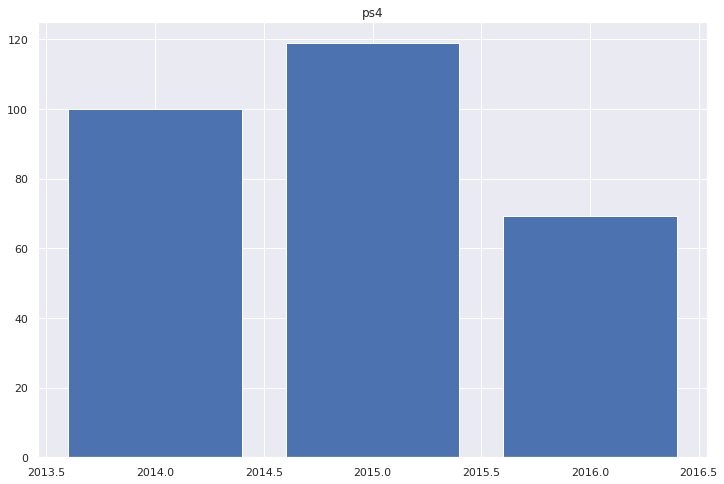

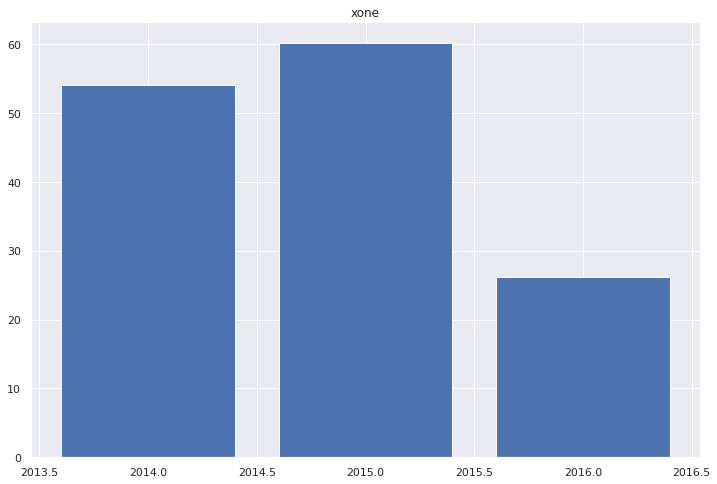

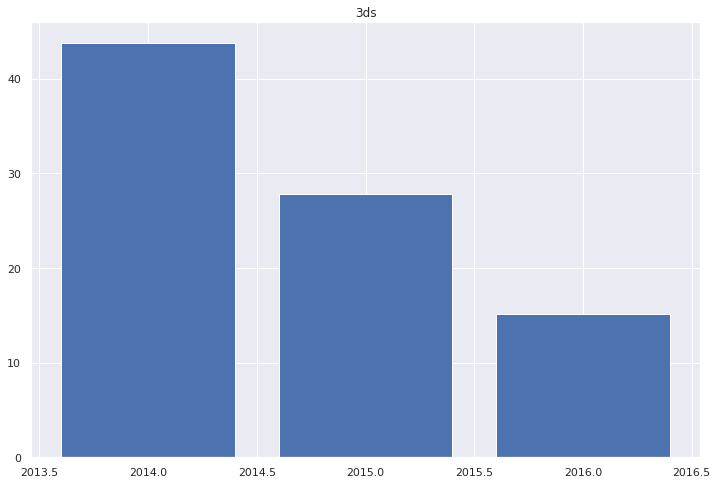

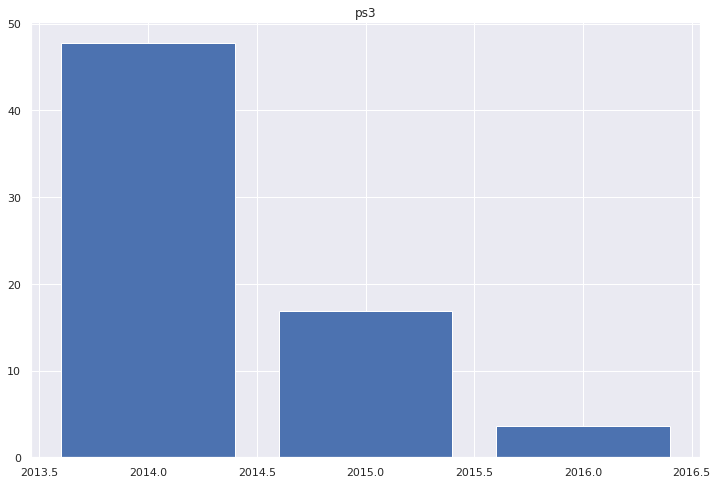

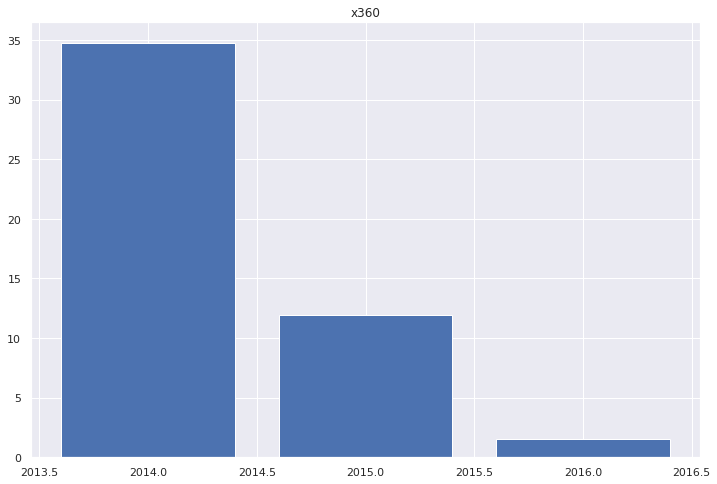

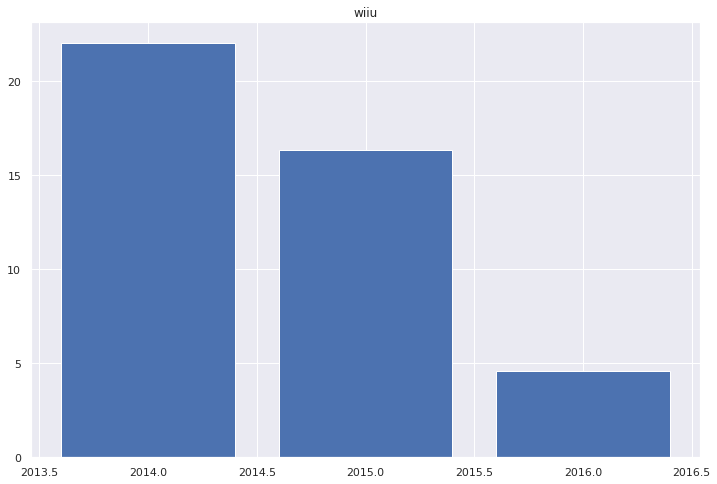

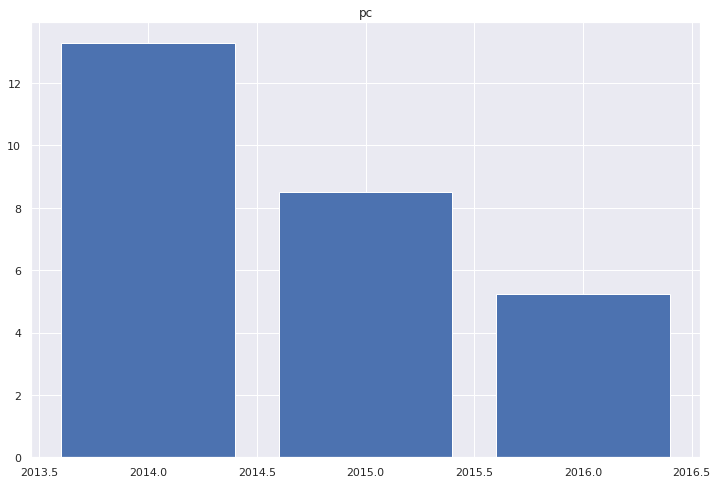

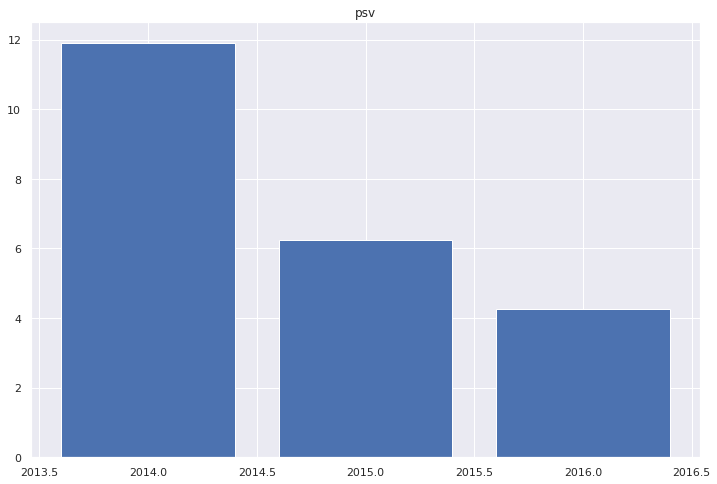

In [ ]:
for i in popular.keys():    
    keys = popular[i].keys()
    values = popular[i].values()
    plt.bar(keys, values)
    plt.title(i)
    plt.show()

Можем заключить, что наиболее популярными являются PS4, XOne, 3DS, WiiU, PC.

Построим график зависимости продаж игры от оценок критиков и рассчитаем, есть ли корреляция между этими параметрами на примере 3DS. 

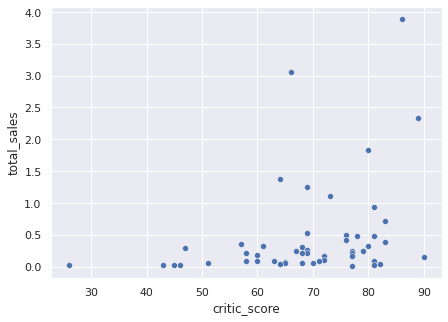

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})
sns.scatterplot(data=data[(data['platform']=='3ds')&\
                          (data['critic_score']>0)], x='critic_score', y='total_sales');

In [ ]:
test = pearsonr(data.loc[(data['platform']=='3ds')&(data['critic_score']>0)]['critic_score'],\
                data.loc[(data['platform']=='3ds')&(data['critic_score']>0)]['total_sales'])
if test[1]<0.05:
    print('Корреляция между оценками критиков и продажами присутствует.')
    print('p-value равно {0:.2}, коэффициент корреляции {1:.2}'.format(test[1], test[0]))
else:
    print('Корреляции между оценками критиков и продажами на данном уровне значимости не выявлено.')
    print('p-value равно {:.2}'.format(test[1]))

Корреляция между оценками критиков и продажами присутствует.
p-value равно 0.025, коэффициент корреляции 0.31


Исходя из p-value и коэффициента корреляции можем заключить, что оценки критиков и продажи игры коррелируют между собой.

Аналогично рассмотрим влияние отзывов пользователей.

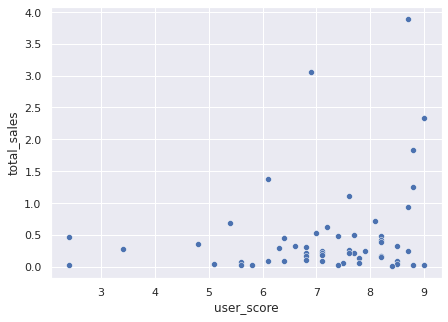

In [ ]:
sns.scatterplot(data=data[(data['platform']=='3ds')&(data['user_score']>0)],\
                x='user_score', y='total_sales');

In [ ]:
test = pearsonr(data.loc[(data['platform']=='3ds')&(data['user_score']>0)]['user_score'],\
                data.loc[(data['platform']=='3ds')&(data['user_score']>0)]['total_sales'])
if test[1]<0.05:
    print('Корреляция между оценками пользователей и продажами присутствует.')
    print('p-value равно {0:.2}, коэффициент корреляции {1:.2}'.format(test[1], test[0]))
else:
    print('Корреляции между оценками пользователей и продажами на данном уровне значимости не выявлено.')
    print('p-value равно {:.2}'.format(test[1]))

Корреляции между оценками пользователей и продажами на данном уровне значимости не выявлено.
p-value равно 0.11


Не выявлено корреляции между оценками пользователей и продажами на уровне значимости 0.05.

Подтвердим выводы анализом другой платформы - PS4.

Корреляция между оценками критиков и продажами присутствует.
p-value равно 1.2e-10, коэффициент корреляции 0.4


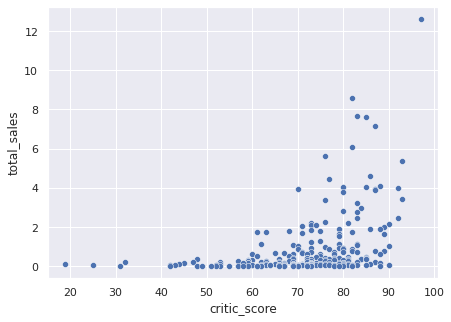

In [ ]:
sns.scatterplot(data=data[(data['platform']=='ps4')&(data['critic_score']>0)], \
                x='critic_score', y='total_sales');

test = pearsonr(data.loc[(data['platform']=='ps4')&(data['critic_score']>0)]['critic_score'],\
                data.loc[(data['platform']=='ps4')&(data['critic_score']>0)]['total_sales'])
if test[1]<0.05:
    print('Корреляция между оценками критиков и продажами присутствует.')
    print('p-value равно {0:.2}, коэффициент корреляции {1:.2}'.format(test[1], test[0]))
else:
    print('Корреляции между оценками критиков и продажами на данном уровне значимости не выявлено.')
    print('p-value равно {:.2}'.format(test[1]))

Корреляции между оценками пользователей и продажами на данном уровне значимости не выявлено.
p-value равно 0.53


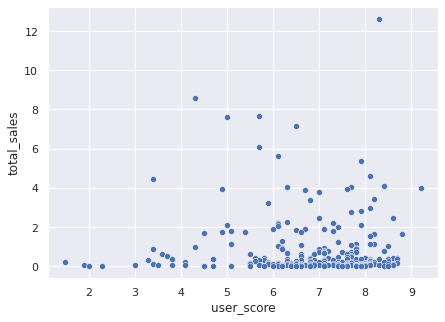

In [ ]:
sns.scatterplot(data=data[(data['platform']=='ps4')&(data['user_score']>0)],\
                x='user_score', y='total_sales');

test = pearsonr(data.loc[(data['platform']=='ps4')&(data['user_score']>0)]['user_score'],\
                data.loc[(data['platform']=='ps4')&(data['user_score']>0)]['total_sales'])
if test[1]<0.05:
    print('Корреляция между оценками пользователей и продажами присутствует.')
    print('p-value равно {0:.2}, коэффициент корреляции {1:.2}'.format(test[1], test[0]))
else:
    print('Корреляции между оценками пользователей и продажами на данном уровне значимости не выявлено.')
    print('p-value равно {:.2}'.format(test[1]))

Видим, что для PS4 на уровне значимости 0.05 не выявлено корреляции между мнениями пользователей и продажами, а отличие от пары оценки критиков - продажи. 

Для всех популярных платформ нельзя дать однозначный ответ насчет корреляции оценок и продаж игр.

Рассмотрим, как влияют жанры на продажи игры.

In [ ]:
genres = data.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum')

In [ ]:
print('5 самых продаваемых жанров:')
print()
print(genres.sort_values('total_sales', ascending=False).head())
print()
print('5 наименее продаваемых жанров:')
print()
print(genres.sort_values('total_sales').head())

5 самых продаваемых жанров:

              total_sales
genre                    
action             199.36
shooter            170.94
sports             109.48
role-playing       101.44
misc                37.55

5 наименее продаваемых жанров:

            total_sales
genre                  
puzzle             2.21
strategy           3.96
simulation        13.13
adventure         17.55
platform          18.09


Наиболее популярные жанры: экшен, спорт, шутеры, RPG, платформеры. Вероятно, это высокобюджетные ААА-игры, с очень большими тратами в маркетинг. Наименее популярные игры - стратегии, приключения, головоломки, симуляторы. Локально популярные, возможно инди-игры.

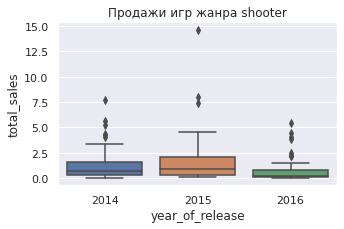

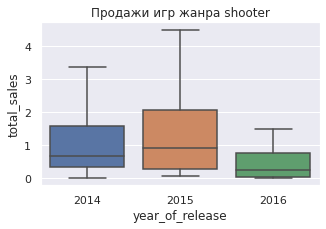

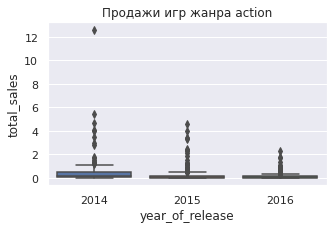

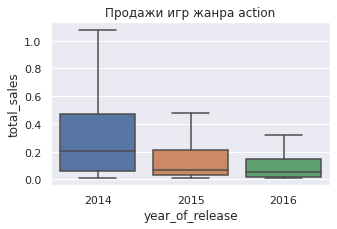

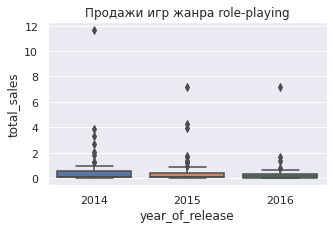

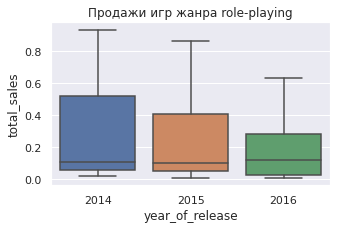

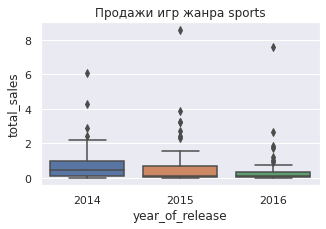

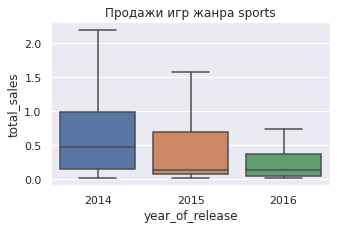

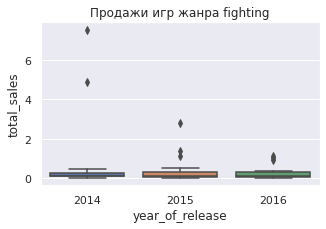

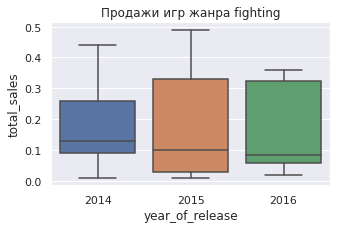

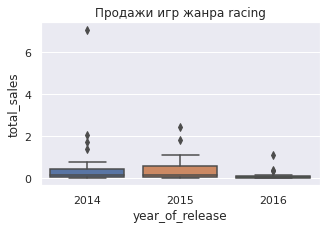

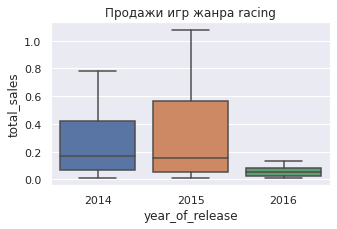

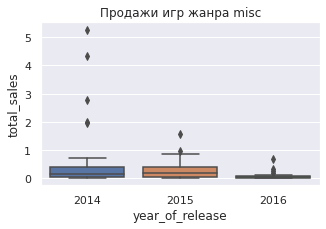

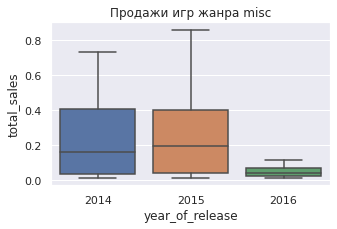

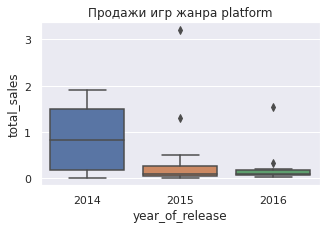

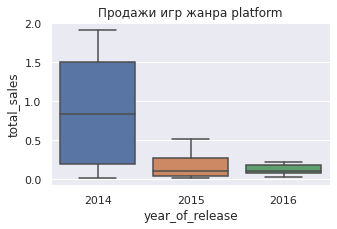

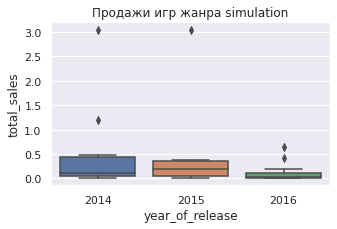

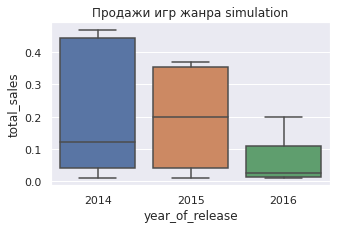

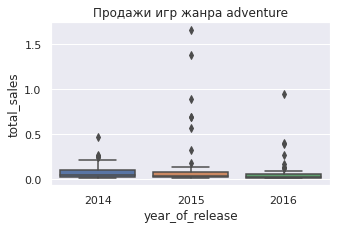

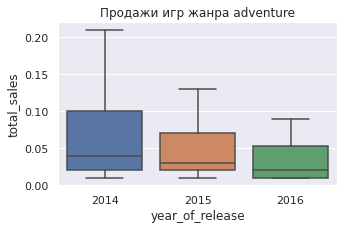

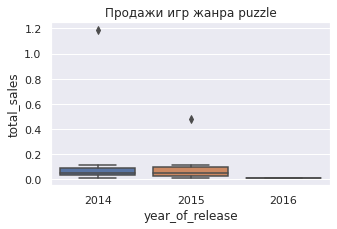

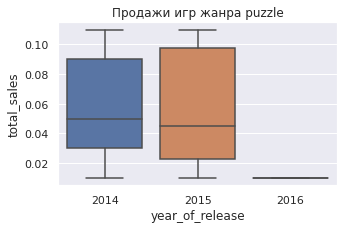

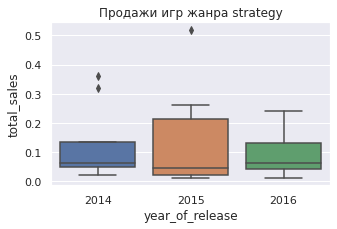

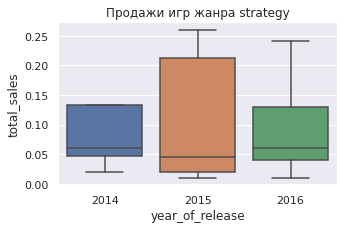

In [ ]:
sns.set(rc={'figure.figsize':(5,3)})
for i in data['genre'].unique():
    sns.boxplot(data=data[data['genre']==i], x="year_of_release", y="total_sales")\
        .set(title='Продажи игр жанра '+i);
    plt.show()
    sns.boxplot(data=data[data['genre']==i], x="year_of_release", y="total_sales", showfliers = False)\
        .set(title='Продажи игр жанра '+i);
    plt.show()

В среднем (точнее, по медиане) популярны игры в жанрах: RPG, Sports, Adventure, Action. В других жанрах (например, Shooter) встречаются отдельные популярные проекты с большими продажами, на них также стоит обратить внимание. 

### Портрет пользователя по регионам

Рассмотрим самые популярные платформы и жанры по регионам, а также выясним, влияет ли возрастной рейтинг на продажи игры.

In [ ]:
genres = data.pivot_table(index = 'genre', values = 'na_sales', aggfunc = 'sum')
print(genres.sort_values('na_sales', ascending = False).head())

              na_sales
genre                 
shooter          79.02
action           72.53
sports           46.13
role-playing     33.47
misc             15.05


In [ ]:
platforms = data.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum')
print(platforms.sort_values('na_sales', ascending = False).head())

          na_sales
platform          
ps4          98.61
xone         81.27
x360         28.30
3ds          22.64
ps3          22.05


In [ ]:
#рассмотрим все варианты 
data['rating'].unique()

array([-1, 'm', 'e', 't', 'e10+'], dtype=object)

In [ ]:
stat = f_oneway(data.loc[data['rating']=='e']['na_sales'],\
                data.loc[data['rating']=='m']['na_sales'], \
                data.loc[data['rating']=='t']['na_sales'],\
                data.loc[data['rating']=='e10+']['na_sales'])
if stat[1]<0.05:
    print('Продажи игр с разным возрастным рейтингом значительно отличаются')
    print('p-value равно {:.2}'.format(stat[1]))
else:
    print('Разницы в продажах игр разного возрастного рейтинга на уровне значимости 0.05 не выявлено')
    print('p-value равно {:.2}'.format(stat[1]))

Продажи игр с разным возрастным рейтингом значительно отличаются
p-value равно 1e-07


В североамериканском регионе наиболее популярны игры жанра экшен, спортивные, шутеры, RPG, а также игры, обозначенные как Misc (Miscellaneous game - "другое" от мира экшен-игр). Пользователи покупают игры для PS4,  XOne, X360, 3DS, PS3. Для покупателей данного региона важен возрастной рейтинг. 

In [ ]:
genres = data.pivot_table(index = 'genre', values = 'eu_sales', aggfunc = 'sum')
print(genres.sort_values('eu_sales', ascending = False).head())

              eu_sales
genre                 
action           74.68
shooter          65.52
sports           45.73
role-playing     28.17
racing           14.13


In [ ]:
platforms = data.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum')
print(platforms.sort_values('eu_sales', ascending = False).head())

          eu_sales
platform          
ps4         130.04
xone         46.25
ps3          25.54
pc           17.97
3ds          16.12


In [ ]:
stat = f_oneway(data.loc[data['rating']=='e']['eu_sales'],\
                data.loc[data['rating']=='m']['eu_sales'], \
                data.loc[data['rating']=='t']['eu_sales'],\
                data.loc[data['rating']=='e10+']['eu_sales'])
if stat[1]<0.05:
    print('Продажи игр с разным возрастным рейтингом значительно отличаются')
    print('p-value равно {:.2}'.format(stat[1]))
else:
    print('Разницы в продажах игр разного возрастного рейтинга на уровне значимости 0.05 не выявлено')
    print('p-value равно {:.2}'.format(stat[1]))

Продажи игр с разным возрастным рейтингом значительно отличаются
p-value равно 9.4e-07


В европейском регионе наиболее популярны игры жанра экшен, спортивные, шутеры, RPG, гонки. Пользователи покупают игры для PS4, XOne, PS3, PC, 3DS. Для покупателей данного региона важен возрастной рейтинг.



In [ ]:
genres = data.pivot_table(index = 'genre', values = 'jp_sales', aggfunc = 'sum')
print(genres.sort_values('jp_sales', ascending = False).head())

              jp_sales
genre                 
role-playing     31.16
action           29.58
fighting          6.37
misc              5.61
shooter           4.87


In [ ]:
platforms = data.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum')
print(platforms.sort_values('jp_sales', ascending = False).head())

          jp_sales
platform          
3ds          44.24
ps4          15.02
psv          14.54
ps3          11.22
wiiu          7.31


In [ ]:
stat = f_oneway(data.loc[data['rating']=='e']['jp_sales'],\
                data.loc[data['rating']=='m']['jp_sales'], \
                data.loc[data['rating']=='t']['jp_sales'],\
                data.loc[data['rating']=='e10+']['jp_sales'])
if stat[1]<0.05:
    print('Продажи игр с разным возрастным рейтингом значительно отличаются')
    print('p-value равно {:.2}'.format(stat[1]))
else:
    print('Разницы в продажах игр разного возрастного рейтинга на уровне значимости 0.05 не выявлено')
    print('p-value равно {:.2}'.format(stat[1]))

Разницы в продажах игр разного возрастного рейтинга на уровне значимости 0.05 не выявлено
p-value равно 0.084


В Японии наиболее популярны игры жанров RPG, экшен, боевки, "другие" экшен-игры, шутеры. Пользователи покупают игры для 3DS, PS4, PSV, PS3, WiiU - продукты азиатских компаний. Для покупателей данного региона важен возрастной рейтинг.


In [ ]:
genres_na = ['shooter', 'action', 'sports', 'role-playing', 'misc']
genres_eu = ['action', 'shooter', 'sports', 'role-playing', 'racing']
genres_jp = ['role-playing', 'action', 'fighting', 'misc', 'shooter']

In [ ]:
sales_g_na = {}
for i in genres_na: 
    sales_g_na[i]=data.loc[data['genre']==i, 'na_sales'].sum()
sales_g_na['other']=data.loc[~data['genre'].isin(genres_na), 'na_sales'].sum()

sales_g_eu = {}
for i in genres_eu: 
    sales_g_eu[i]=data.loc[data['genre']==i, 'eu_sales'].sum()
sales_g_eu['other']=data.loc[~data['genre'].isin(genres_eu), 'eu_sales'].sum()

sales_g_jp = {}
for i in genres_jp: 
    sales_g_jp[i]=data.loc[data['genre']==i, 'jp_sales'].sum()
sales_g_jp['other']=data.loc[~data['genre'].isin(genres_jp), 'jp_sales'].sum()

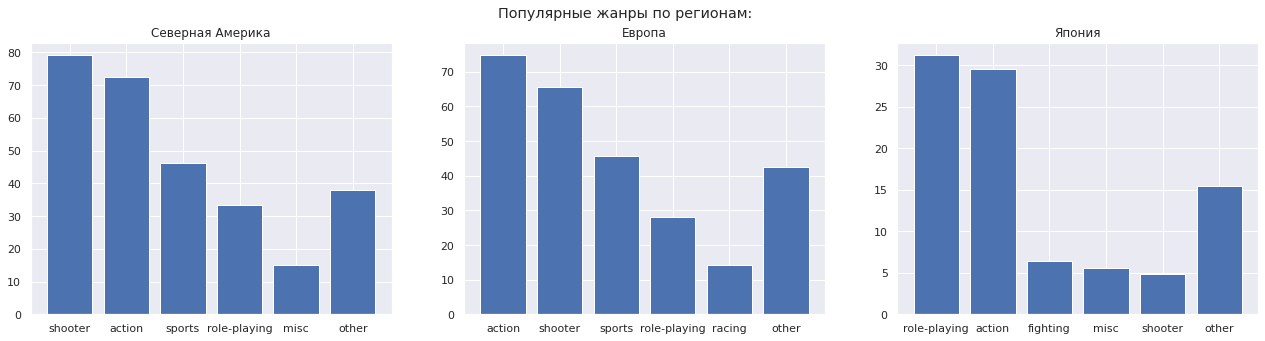

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))
axs[0].bar(sales_g_na.keys(), sales_g_na.values())
axs[0].set_title('Северная Америка')
axs[1].bar(sales_g_eu.keys(), sales_g_eu.values())
axs[1].set_title('Европа')
axs[2].bar(sales_g_jp.keys(), sales_g_jp.values())
axs[2].set_title('Япония')


fig.suptitle("Популярные жанры по регионам:")
fig.subplots_adjust(hspace=0.1)
plt.show()


In [ ]:
platf_na = ['ps4', 'xone', 'x360', '3ds', 'ps3']
platf_eu = ['ps4', 'xone', 'ps3', 'pc', '3ds']
platf_jp = ['3ds', 'ps4', 'psv', 'ps3', 'wiiu']


In [ ]:
sales_p_na = {}
for i in platf_na: 
    sales_p_na[i]=data.loc[data['platform']==i, 'na_sales'].sum()
sales_p_na['other']=data.loc[~data['platform'].isin(platf_na), 'na_sales'].sum()

sales_p_eu = {}
for i in platf_eu: 
    sales_p_eu[i]=data.loc[data['platform']==i, 'eu_sales'].sum()
sales_p_eu['other']=data.loc[~data['platform'].isin(platf_eu), 'eu_sales'].sum()

sales_p_jp = {}
for i in platf_jp: 
    sales_p_jp[i]=data.loc[data['platform']==i, 'jp_sales'].sum()
sales_p_jp['other']=data.loc[~data['platform'].isin(platf_jp), 'jp_sales'].sum()

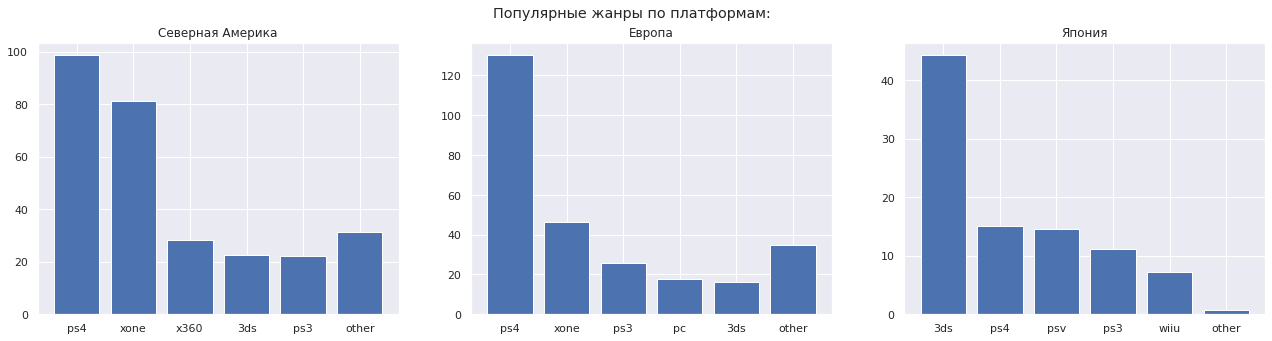

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(22, 5))
axs[0].bar(sales_p_na.keys(), sales_p_na.values())
axs[0].set_title('Северная Америка')
axs[1].bar(sales_p_eu.keys(), sales_p_eu.values())
axs[1].set_title('Европа')
axs[2].bar(sales_p_jp.keys(), sales_p_jp.values())
axs[2].set_title('Япония')


fig.suptitle("Популярные жанры по платформам:")
fig.subplots_adjust(hspace=0.1)
plt.show()

In [ ]:
ratings = ['m', 'e', 't', 'e10+']
na_rat ={}
eu_rat = {}
jp_rat = {}
for i in ratings:
    na_rat[i]=data.loc[data['rating']==i, 'na_sales'].sum()
    eu_rat[i]=data.loc[data['rating']==i, 'eu_sales'].sum()
    jp_rat[i]=data.loc[data['rating']==i, 'jp_sales'].sum()


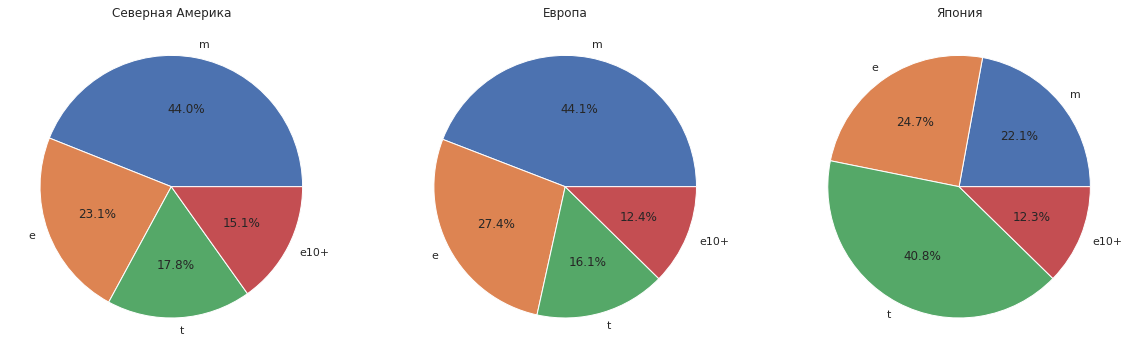

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20))
axs[0].pie(na_rat.values(), labels=na_rat.keys(), autopct='%1.1f%%')
axs[0].set_title('Северная Америка')
axs[1].pie(eu_rat.values(), labels=eu_rat.keys(), autopct='%1.1f%%')
axs[1].set_title('Европа')
axs[2].pie(jp_rat.values(), labels=jp_rat.keys(), autopct='%1.1f%%')
axs[2].set_title('Япония')

#fig.suptitle("Распределение купленных игр по возрастным рейтингам")
fig.subplots_adjust(hspace=0.5)
plt.show()

### Проверка статистических гипотез



> Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Нулевая гипотеза: рейтинги равны. Альтернативная: рейтинги различаются (двухсторонняя). Сравниваем 2 средних по выборкам, используем t-test, предварительно сравнив дисперсии двух выборок. 



In [ ]:
df.loc[df['platform']=='xone', 'year_of_release'].unique()

array([2015, 2014, 2013, 2016])

In [ ]:
xone_score = np.array(df.loc[(df['platform']=='xone')&\
                             (df['user_score']>0), 'user_score'])
pc_score = np.array(df.loc[(df['platform']=='pc')&\
                           (df['user_score']>0)&(df['year_of_release']>2012),\
                           'user_score'])


if 0.25 < (np.var(xone_score)/np.var(pc_score)) < 4:
    test = stats.ttest_ind(a=xone_score, b=pc_score, equal_var=True)
else:
    test = stats.ttest_ind(a=xone_score, b=pc_score, equal_var=False)

if test[1]<0.05:
    print('Рейтинги на платформах статистически значимо отличаются')
    print('p-value равно {:.2}'.format(test[1]))
else:
    print('Разницы в средней оценке игр на платформах на уровне значимости 0.05 не выявлено')
    print('p-value равно {:.2}'.format(test[1]))

Разницы в средней оценке игр на платформах на уровне значимости 0.05 не выявлено
p-value равно 0.14


**Вывод:** рейтинги игр на платформах XBox One и PC статистически значимо не отличаются (на уровне значимости 0.05).



> Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевая гипотеза: средние значения пользовательских рейтингов одинаковые. Альтернативная - рейтинги различаются. Проверяем аналогично случаю выше.



In [ ]:
action_score = np.array(df.loc[(df['genre']=='action')&(df['user_score']>0), 'user_score'])
sports_score = np.array(df.loc[(df['genre']=='sports')&(df['user_score']>0), 'user_score'])


if 0.25 < (np.var(action_score)/np.var(sports_score)) < 4:
    test = stats.ttest_ind(a=action_score, b=sports_score, equal_var=True)
else:
    test = stats.ttest_ind(a=action_score, b=sports_score, equal_var=False)

if test[1]<0.05:
    print('Рейтинги на платформах статистически значимо отличаются')
    print('p-value равно {:.2}'.format(test[1]))
else:
    print('Разницы в средней оценке игр на платформах на уровне значимости 0.05 не выявлено')
    print('p-value равно {:.2}'.format(test[1]))

Разницы в средней оценке игр на платформах на уровне значимости 0.05 не выявлено
p-value равно 0.11


**Вывод:** средние рейтинги игр жанров экшен и спорт не различаются на уровне значимости 0.05. 

### Общий вывод:

В ходе работы была проведена предобработка данных: заполнены пропуски и изменены типы данных в некоторых столбцах. Устранены дупликаты. Для каждой игры были вычислены общие продажи.

Затем была проанализирована динамика изменения числа выпускаемых игр и продаж с течением времени. Выяснено, что "время жизни" платформы составляет примерно 10 лет. Был выделен период 2014-2015-2016 год для более детального анализа популярных платформ. Исходя из проведенного анализа, можно предположить, что в 2017 году будут популярны игры для PS4, XOne, 3DS, WiiU, PC. 

На примере PS4 и Nintendo 3DS было показано наличие корреляции между продажами копий игры и оценками критиков (на уровне значимости 0.05), для оценок пользователей такой корреляции не найдено. 

Наиболее популярные жанры: экшен, спорт, шутеры, RPG, платформеры. Вероятно, это высокобюджетные ААА-игры, с очень большими тратами в маркетинг. Наименее популярные игры - стратегии, приключения, головоломки, симуляторы. Локально популярные, возможно инди-игры. Однако медианно наиболее продаваемые игры в жанрах: RPG, спорт, приключения, экшен.


Далее был получен портрет типичного покупателя для трех регионов (данные также продублированы ниже в виде графиков): 

* В североамериканском регионе наиболее популярны игры жанра экшен, спортивные, шутеры, RPG, а также игры, обозначенные как Misc (Miscellaneous game - "другое" от мира экшен-игр). Пользователи покупают игры для PS4, XOne, X360, 3DS, PS3. 

* В Японии наиболее популярны игры жанров RPG, экшен, боевки, Miscellaneous game, шутеры. Пользователи покупают игры для 3DS, PS4, PSV, PS3, WiiU - продукты азиатских компаний. 

* В европейском регионе наиболее популярны игры жанра экшен, спортивные, шутеры, RPG, гонки. Пользователи покупают игры для PS4, XOne, PS3, PC, 3DS. 

Для покупателей всех регионов важны возрастные рейтинги.

Был проведен анализ двух предложенных гипотез и сделаны следующие выводы: 



1.   Рейтинги игр на платформах XBox One и PC статистически значимо не отличаются (на уровне значимости 0.05).
2.   Средние рейтинги игр жанров экшен и спорт не различаются на уровне значимости 0.05.



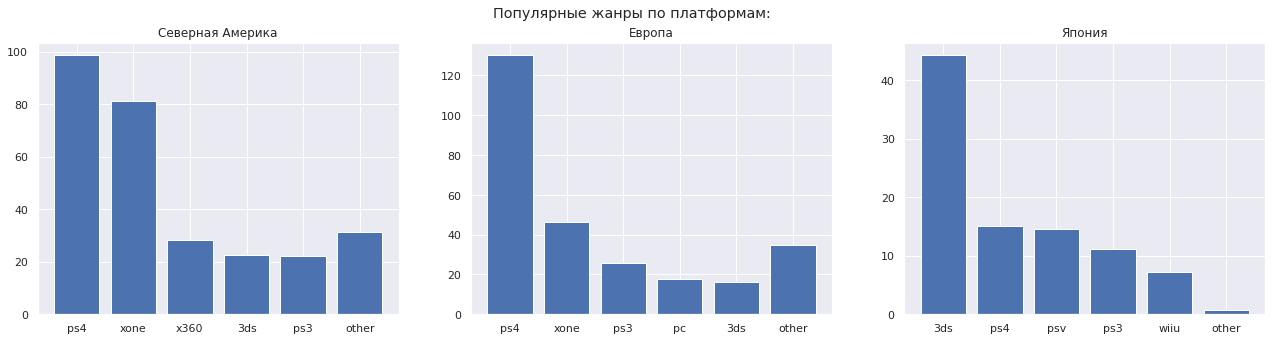


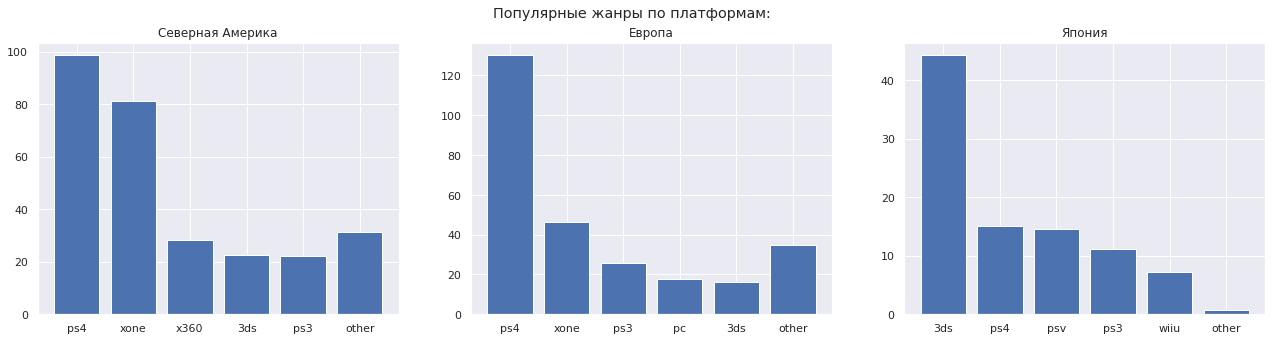